In [3]:
# подгружаем все нужные пакеты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

df = pd.read_csv("C:/Users/Battlestation/Downloads/chat.csv")
df.head()


,Name,Activity,Messages,Active days,Flood ratio
0,Zart,9.59%,1864,32,116
1,b0g3r,5.95%,1537,31,91
2,in favor,3.32%,630,29,100
3,Aleksandr Biryukov,3.11%,555,5,138
4,Robert Ford,2.91%,229,23,131


In [4]:
df2 = pd.read_csv("C:/Users/Battlestation/Downloads/chat2.csv")
df2.head()

,Name,Activity,Messages,Active days,Flood ratio
0,Zart,9.61%,1794,31,112
1,b0g3r,6.04%,1508,30,88
2,in favor,3.38%,614,28,97
3,Aleksandr Biryukov,3.22%,555,5,133
4,Robert Ford,3.01%,229,23,127


In [8]:
df.info() ; df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
Name           499 non-null object
Activity       499 non-null object
Messages       499 non-null int64
Active days    499 non-null int64
Flood ratio    499 non-null int64
dtypes: int64(3), object(2)
memory usage: 19.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 5 columns):
Name           489 non-null object
Activity       489 non-null object
Messages       489 non-null int64
Active days    489 non-null int64
Flood ratio    489 non-null int64
dtypes: int64(3), object(2)
memory usage: 19.2+ KB


J:\HiEnd\StandAloneComplex\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
J:\HiEnd\StandAloneComplex\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


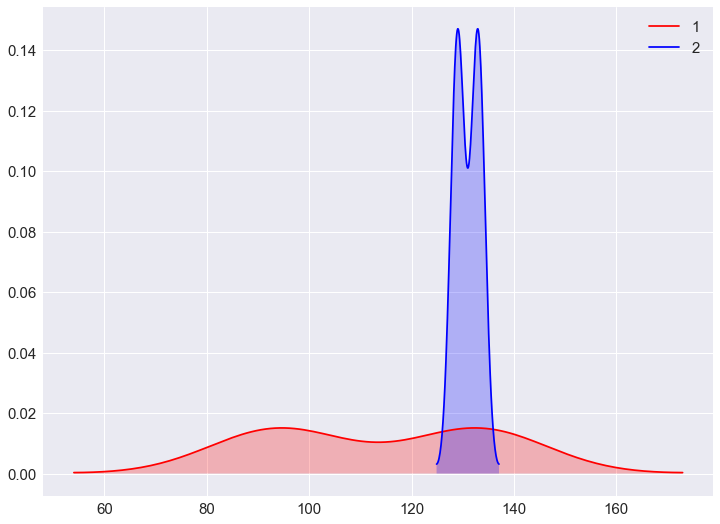

In [12]:
sns.kdeplot(df['Flood ratio'][df.loc[0]], shade=True, color="r", label='1')
sns.kdeplot(df2['Flood ratio'][df2.loc[0]], shade=True, color="b", label='2')

J:\HiEnd\StandAloneComplex\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
J:\HiEnd\StandAloneComplex\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


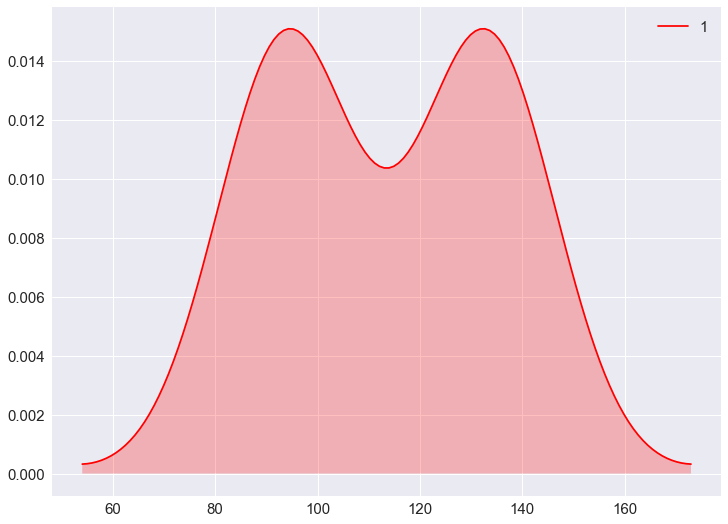

In [13]:
sns.kdeplot(df['Flood ratio'][df.loc[0]], shade=True, color="r", label='1')

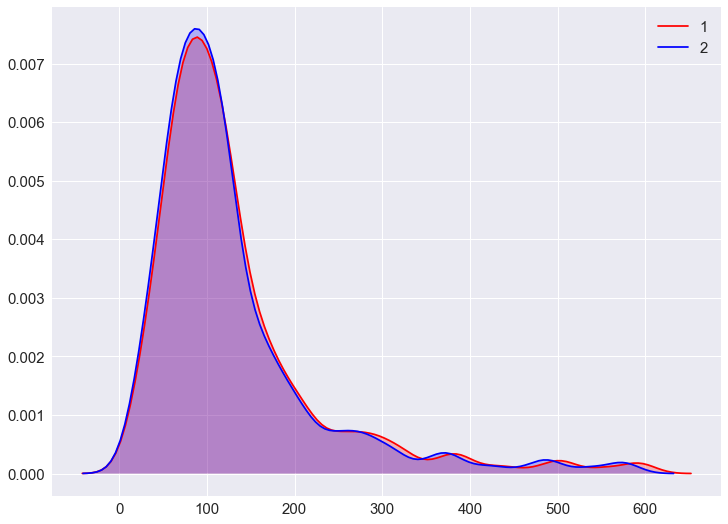

In [15]:
sns.kdeplot(df['Flood ratio'], shade=True, color="r", label='1')
sns.kdeplot(df2['Flood ratio'], shade=True, color="b", label='2')

In [18]:
df['Flood ratio'].loc[0]

116

In [19]:
df2['Flood ratio'].loc[0]

112

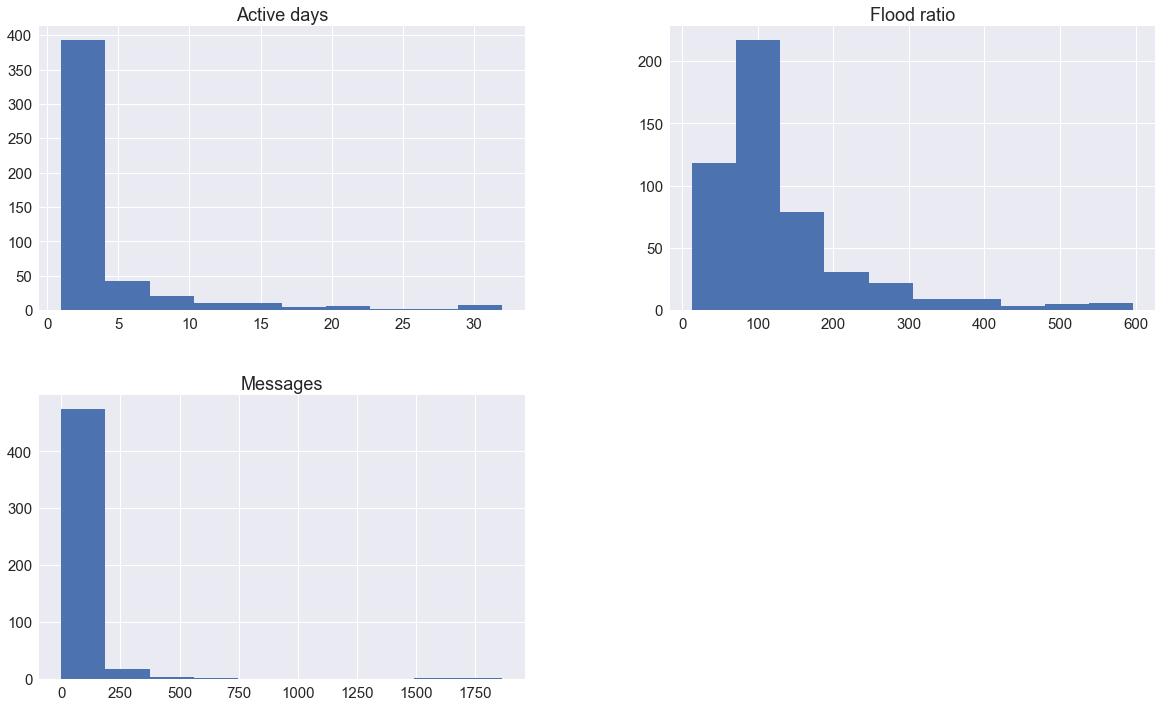

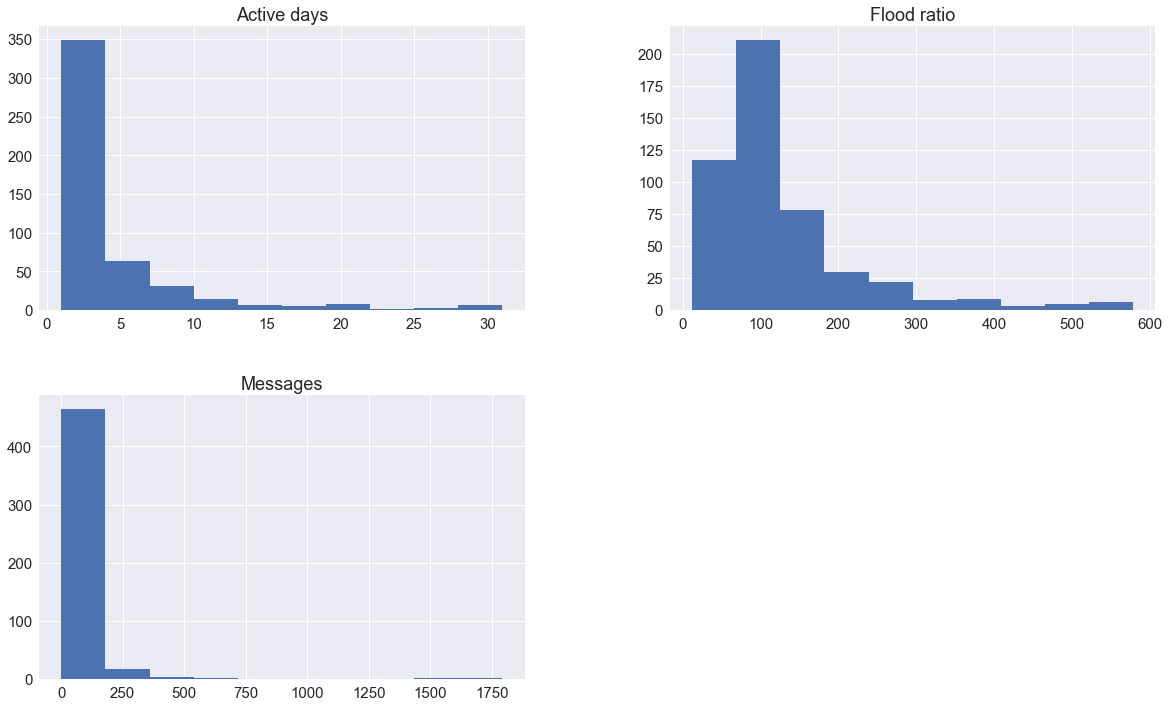

In [23]:
features = df.columns ; feauters2 = df2.columns
df[features].hist(figsize=(20,12)); df2[features].hist(figsize=(20,12));

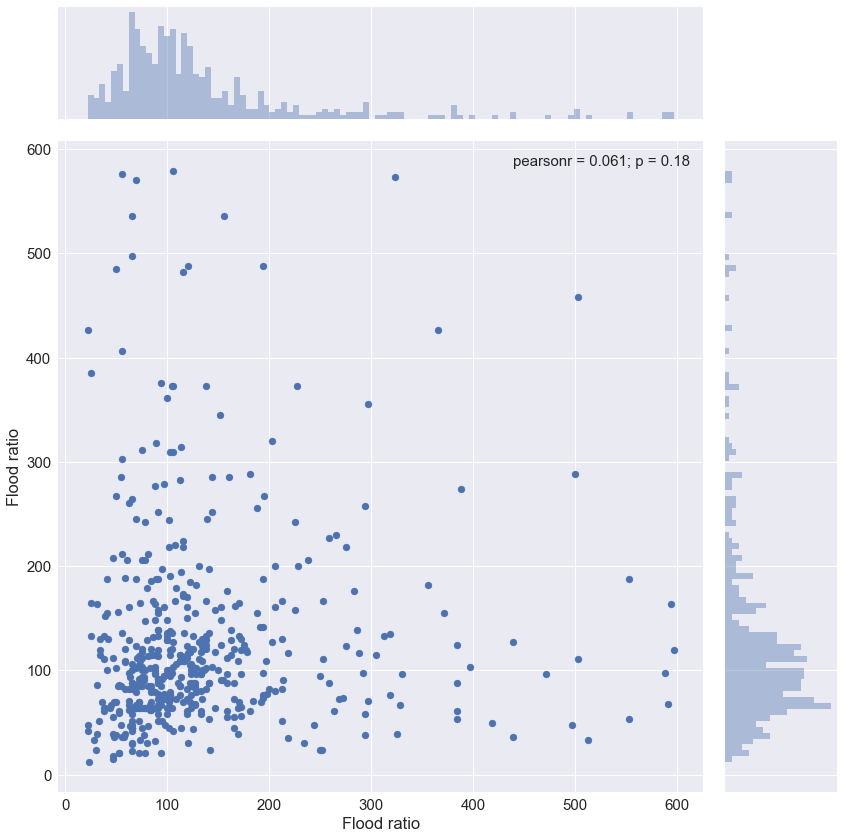

In [24]:
sns.jointplot(df['Flood ratio'], df2['Flood ratio'], size=12,  marginal_kws=dict(bins=100, rug=False));

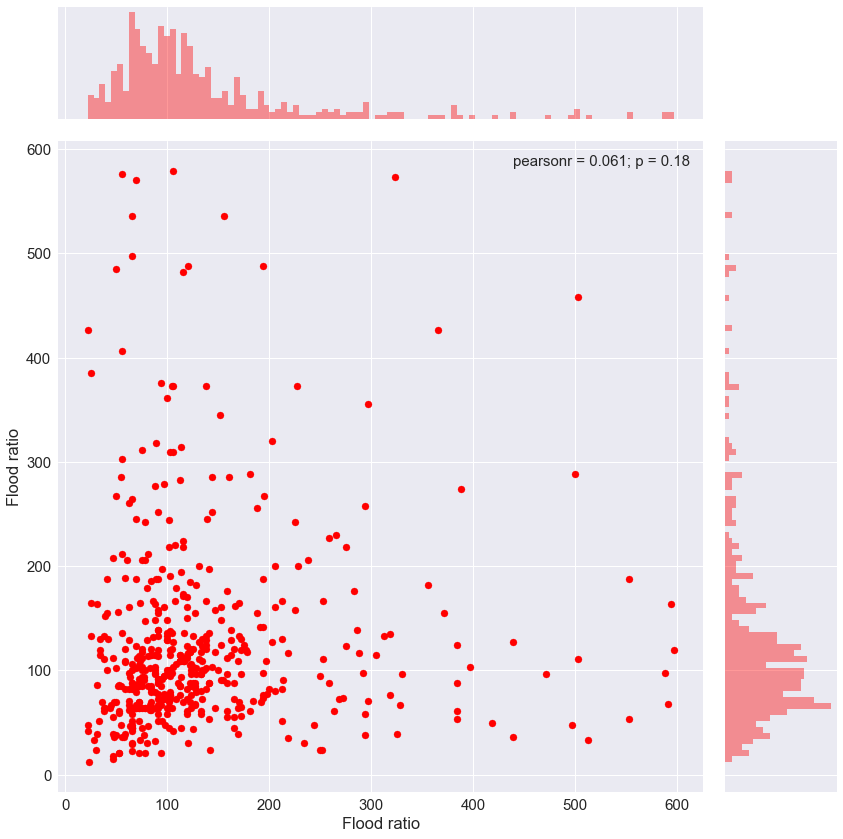

In [29]:
sns.jointplot(df['Flood ratio'], df2['Flood ratio'], size=12, color='r', marginal_kws=dict(bins=100, rug=False));

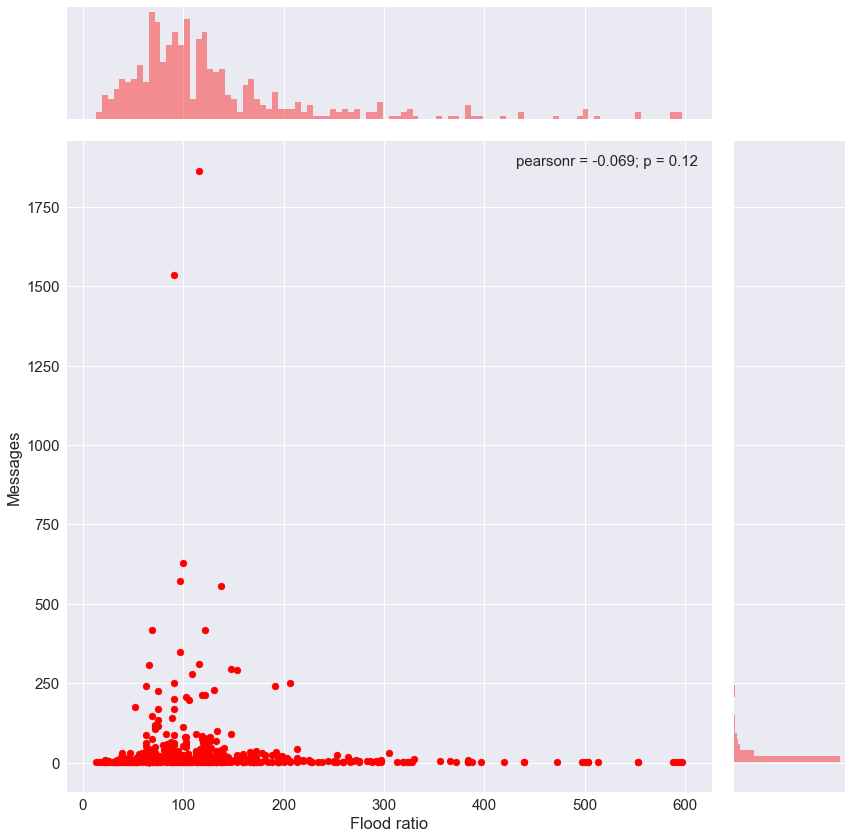

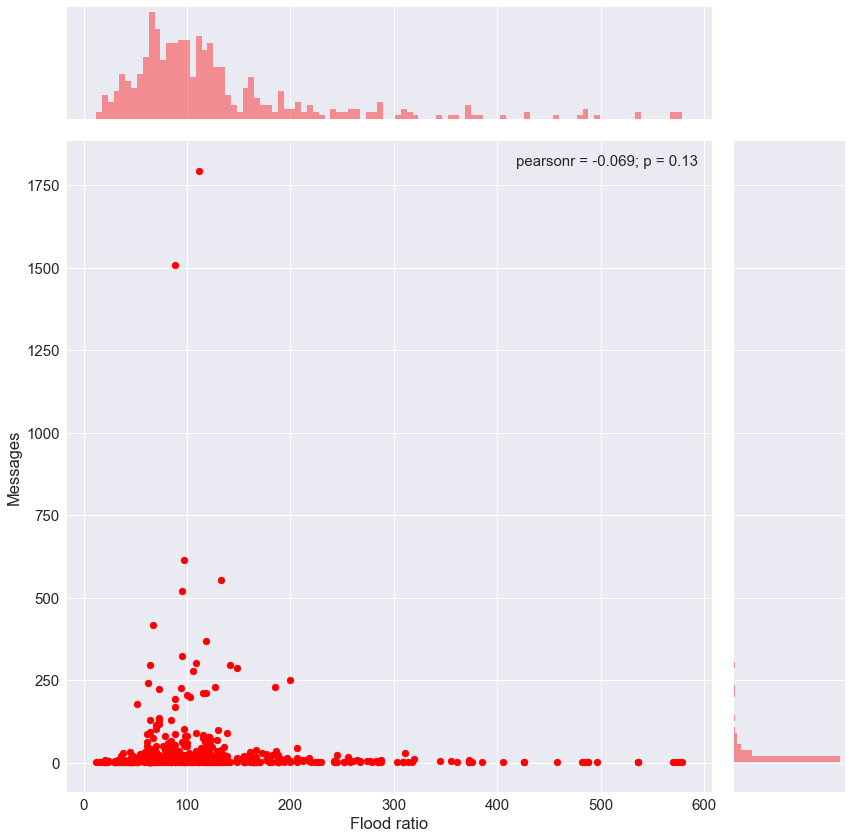

In [30]:
sns.jointplot(df['Flood ratio'], df['Messages'], size=12, color='r', marginal_kws=dict(bins=100, rug=False));
sns.jointplot(df2['Flood ratio'], df2['Messages'], size=12, color='r', marginal_kws=dict(bins=100, rug=False));

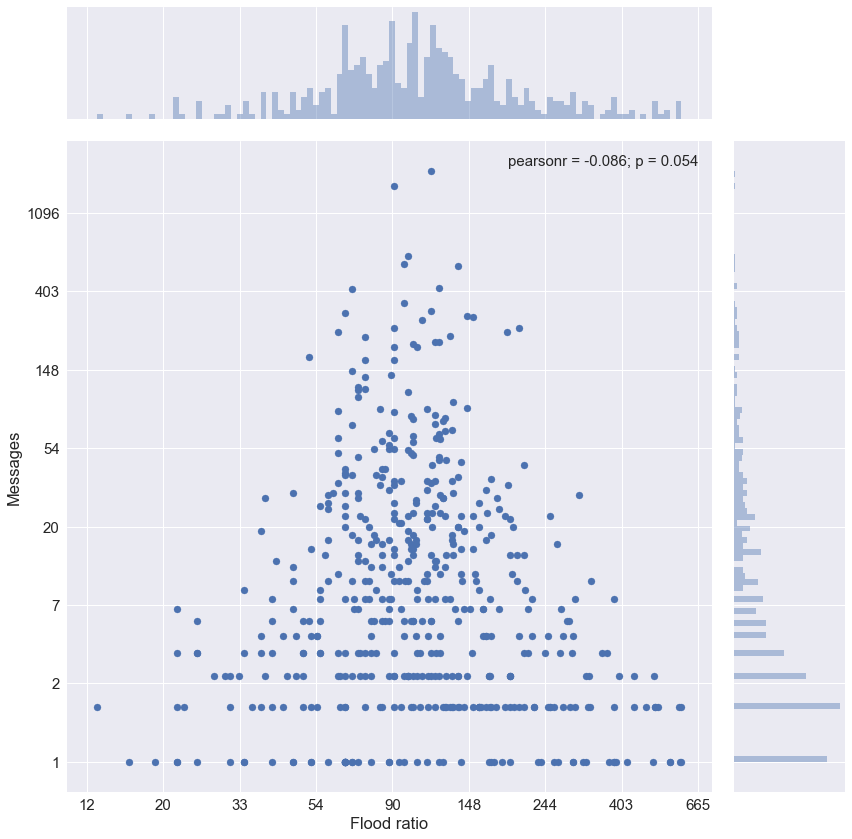

In [31]:
tmp_df = df[(df['Flood ratio'] > 0) & (df['Messages'] > 0)][['Messages', 'Flood ratio']].apply(np.log)
g = sns.jointplot(tmp_df['Flood ratio'], tmp_df['Messages'], size= 12, marginal_kws=dict(bins=100, rug=False))
# -------------------- #

"""Сетка"""
g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные"""
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

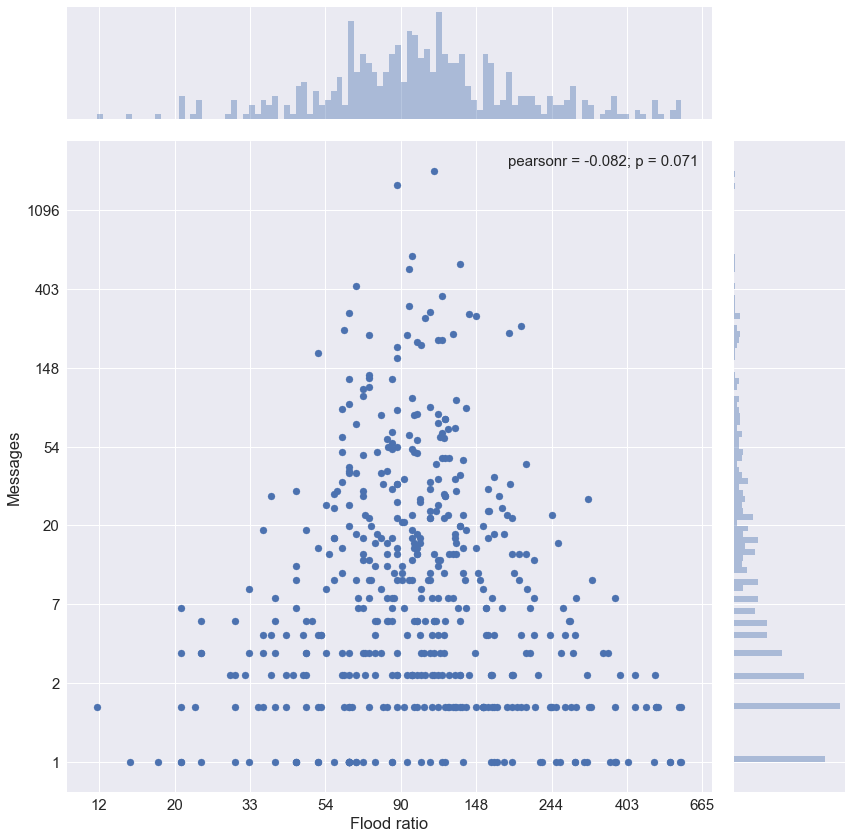

In [33]:
tmp_df2 = df2[(df2['Flood ratio'] > 0) & (df2['Messages'] > 0)][['Messages', 'Flood ratio']].apply(np.log)
g = sns.jointplot(tmp_df2['Flood ratio'], tmp_df2['Messages'], size= 12, marginal_kws=dict(bins=100, rug=False))
# -------------------- #

"""Сетка"""
g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные"""
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

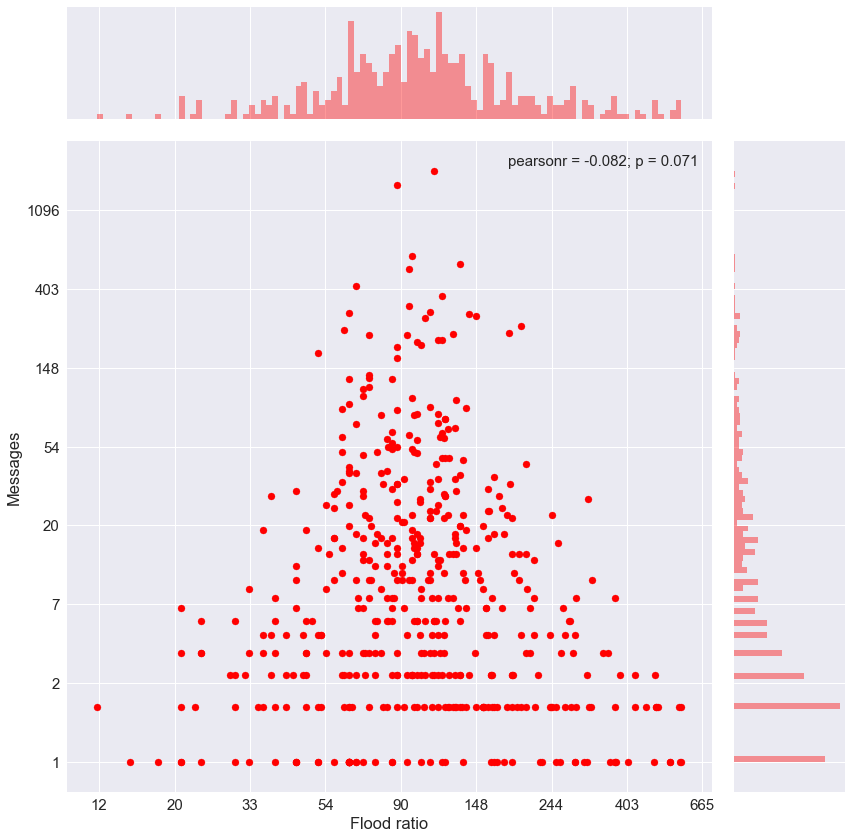

In [34]:
tmp_df2 = df2[(df2['Flood ratio'] > 0) & (df2['Messages'] > 0)][['Messages', 'Flood ratio']].apply(np.log)
g = sns.jointplot(tmp_df2['Flood ratio'], tmp_df2['Messages'], size= 12,color ="r", marginal_kws=dict(bins=100, rug=False))
# -------------------- #

"""Сетка"""
g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные"""
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

In [35]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [36]:
X = df.drop(['Name', 'Activity'], axis=1)

In [37]:
X['Flood ratio'] = pd.factorize(X['Flood ratio'])[0]
X['Messages'] = pd.factorize(X['Messages'])[0]

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

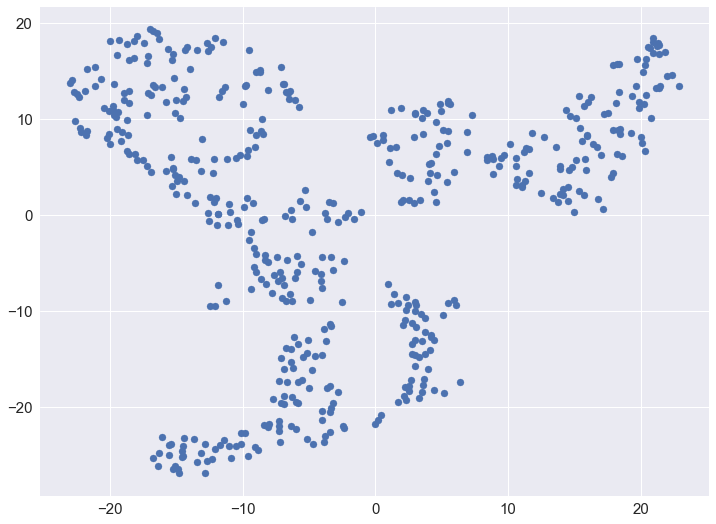

In [40]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [46]:
x = df2

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

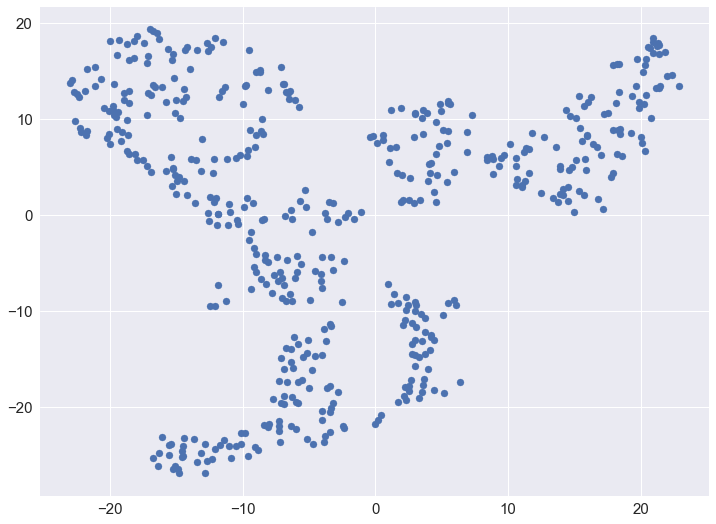

In [49]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

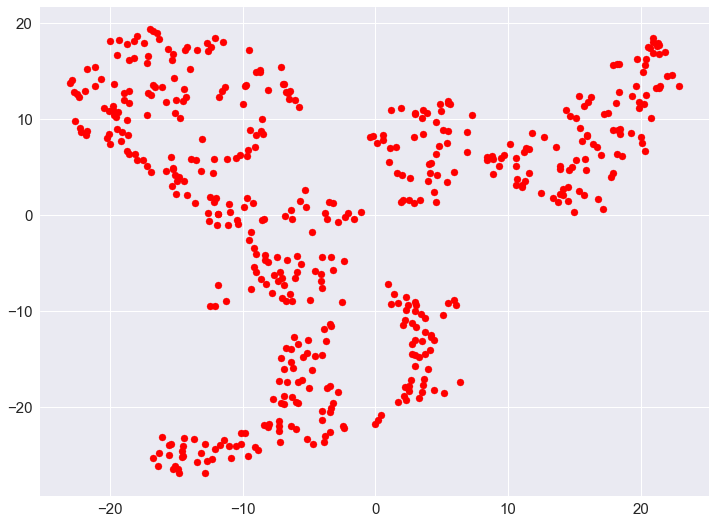

In [52]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], color ="r") ; 
            

In [64]:
X = df.drop(['Name', 'Activity'], axis=1)
Y = df2.drop(['Name', 'Activity'], axis=1)

In [65]:
X['Flood ratio'] = pd.factorize(X['Flood ratio'])[0]
X['Messages'] = pd.factorize(X['Messages'])[0]
X['Active days'] = pd.factorize(X['Active days'])[0]

In [67]:
Y['Flood ratio'] = pd.factorize(Y['Flood ratio'])[0]
Y['Messages'] = pd.factorize(Y['Messages'])[0]
Y['Active days'] = pd.factorize(Y['Active days'])[0]

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [69]:
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)
tsne_representation = tsne.fit_transform(Y_scaled)

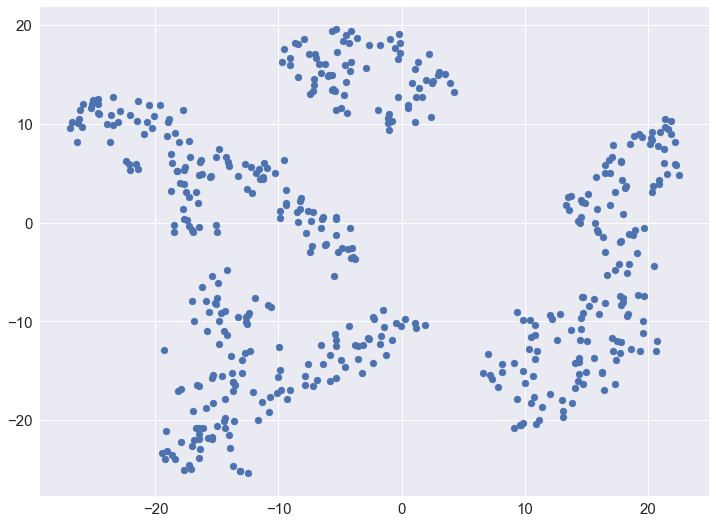

In [70]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);